<a href="https://colab.research.google.com/github/kitadev070/hello-world/blob/master/%E5%8D%98%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# vector
x = np.array([1,2,3])
y = np.array([2,3.9,6.1])

In [7]:
# 平均の計算
print(x.mean(), y.mean())

2.0 4.0


In [10]:
# 中心化
xc = x - x.mean()
yc = y - y.mean()
print(xc, yc)

[-1.  0.  1.] [-2.  -0.1  2.1]


## パラメータaの計算

In [15]:
# 要素ごとの計算
xx = xc * xc
xx

array([1., 0., 1.])

In [16]:
xy = xc * yc
xy

array([ 2. , -0. ,  2.1])

In [17]:
xx.sum()

2.0

In [18]:
xy.sum()

4.1

In [20]:
 a = xy.sum()/xx.sum()

In [21]:
a

2.05

## Pandas: データベースの操作

In [22]:
!pwd

/content


In [23]:
import pandas as pd

In [68]:
df = pd.read_csv('sample.csv')

In [69]:
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [70]:
x = df['x']
y = df['y']

In [29]:
import matplotlib.pyplot as plt

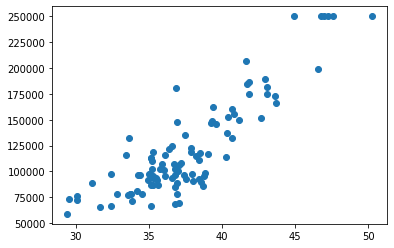

In [31]:
# 散布図
plt.scatter(x,y)
plt.show()

# 短回帰分析の実装

## データの中心化

In [33]:
# データの概要
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [36]:
df_c = df - df.mean()
df_c.head(3)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0


In [37]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,2.557954e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


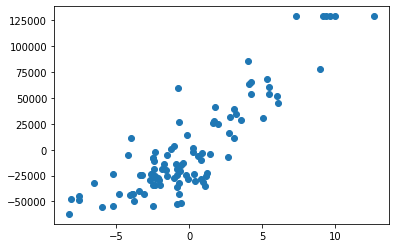

In [38]:
# データの抽出
x = df_c['x']
y = df_c['y']
plt.scatter(x,y)
plt.show()

## パラメータaの計算

In [40]:
xx = x * x
xy = x * y

In [42]:
a = xy.sum() / xx.sum()

In [43]:
a

10069.022519284063

# プロットして確認
$$
\hat{y} = ax
$$

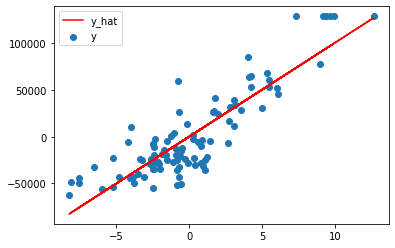

In [46]:
plt.scatter(x,y, label='y')
plt.plot(x, a*x, label='y_hat', color='red')
plt.legend()
plt.show()

## 予測値の計算


In [48]:
x_new = 40
mean = df.mean()

In [55]:
print(mean['x'], mean['y'])

37.62222 121065.0


In [51]:
xc = x_new - mean['x']
xc

2.3777800000000013

In [53]:
yc = a * xc
yc

23941.920365903272

In [54]:
y_hat = a * xc + mean['y']
y_hat

145006.92036590326

予測値を計算する関数の作成

In [58]:
def predict(x):
  a = 10069.022519284063
  xm = 37.62222
  ym = 121065.0
  xc = x - xm
  y_hat = a * xc + ym
  return y_hat

In [59]:
predict(40)

145006.92036590326

In [61]:
predict(30)

44316.695173062646

In [62]:
predict(50)

245697.1455587439

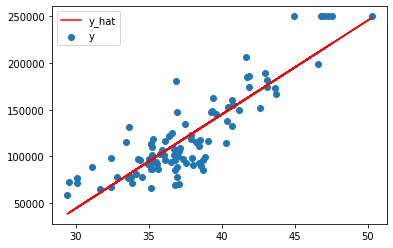

In [106]:
#df_c = df.mean()
#x_mean = df_c['x']
#y_mean = df_c['y']

x = df['x']
y = df['y']

#xc = x - x_mean
#yc = y - y_mean
x_mean = x.mean()
y_mean = y.mean()

xc = x - x_mean
yc = y - y_mean

xy = (xc * yc)
xx = xc * xc
a = xy.sum() / xx.sum()
y_hat = a * xc + y_mean
plt.scatter(x,y, label='y')
plt.plot(x, y_hat, label='y_hat', color='red')
plt.legend()
plt.show()

In [99]:
x.mean()

37.62222

In [100]:
y.mean()

121065.0

In [101]:
x_mean

37.62222

In [103]:
y_mean

121065.0